# CNN Architecture | Assignment

**Question 1: What is the role of filters and feature maps in Convolutional Neural Network (CNN)?**

In a CNN, filters (kernels) scan over the input image to detect specific patterns like edges, textures, or shapes. Each filter extracts a particular type of feature. The output generated by applying a filter is called a feature map, which highlights where that pattern appears in the image. Together, filters learn different visual features, and feature maps represent how strongly those features are activated across the image.

**Question 2: Explain the concepts of padding and stride in CNNs(Convolutional Neural Network). How do they affect the output dimensions of feature maps?**

Padding is the process of adding extra pixels (usually zeros) around the input image. It helps preserve spatial dimensions after convolution and prevents loss of edge information. With padding, the output feature map becomes larger because the filter can slide over more positions.

Stride refers to how many pixels the filter moves at each step. A stride of 1 means the filter moves one pixel at a time, producing a larger feature map. A higher stride (e.g., 2) reduces the output size because the filter skips more positions. Together, padding increases output dimensions, while higher stride decreases them.

**Question 3: Define receptive field in the context of CNNs. Why is it important for deep architectures?**

The receptive field in a CNN is the region of the input image that a particular neuron (or feature in deeper layers) is able to “see” or be influenced by. As we move deeper into the network, each neuron covers a larger area of the original image due to stacking of convolution and pooling layers.

It is important because a larger receptive field allows deeper layers to capture higher-level, more global features (like shapes or objects), rather than just small local patterns (like edges). This enables deep architectures to understand complex structures and make better predictions.

**Question 4: Discuss how filter size and stride influence the number of parameters in a CNN**.

The filter size directly affects the number of parameters in a CNN. A larger filter (e.g., 5×5 instead of 3×3) has more weights, so it increases the total parameters in that layer. For example, a 3×3 filter has 9 weights per channel, while a 5×5 filter has 25.

The stride, however, does not affect the number of parameters because it only controls how the filter moves over the input. What stride changes is the size of the output feature map, not the number of weights in the filter. So:

Filter size ↑ → parameters ↑

Stride change → parameters unchanged

Stride influences computation and feature map size, but not the trainable parameters.


**Question 5: Compare and contrast different CNN-based architectures like LeNet**, **AlexNet,and VGG in terms of depth, filter sizes, and performance**.

LeNet is one of the earliest CNN architectures and is relatively shallow, consisting of only a few convolutional and fully connected layers. It mainly uses 5×5 filters and was designed for simple tasks like digit recognition. Its computational cost is low, but its performance is limited to small and simple datasets.

AlexNet is deeper compared to LeNet, with 8 layers (5 convolutional and 3 fully connected). It uses larger filters in the early layers, such as 11×11 and 5×5, followed by 3×3 filters. AlexNet brought a major breakthrough on the ImageNet challenge, introducing concepts like ReLU activation, dropout, and data augmentation, significantly improving performance over older architectures.

VGG is much deeper, with 16 or 19 layers, and uses a very uniform design based only on 3×3 convolution filters stacked multiple times. This simple but deep structure gives VGG very strong performance on large-scale image datasets, though it requires heavy computation and a large number of parameters. Among the three, VGG provides the highest accuracy but at the cost of being computationally expensive.

In [3]:
# Question 6: Using keras, build and train a simple CNN model on the MNIST dataset from scratch.
# Include code for module creation, compilation, training, and evaluation.

from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("training dataset - %d "%len(X_train))
print("testing dataset - %d "%len(X_test))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
training dataset - 60000 
testing dataset - 10000 


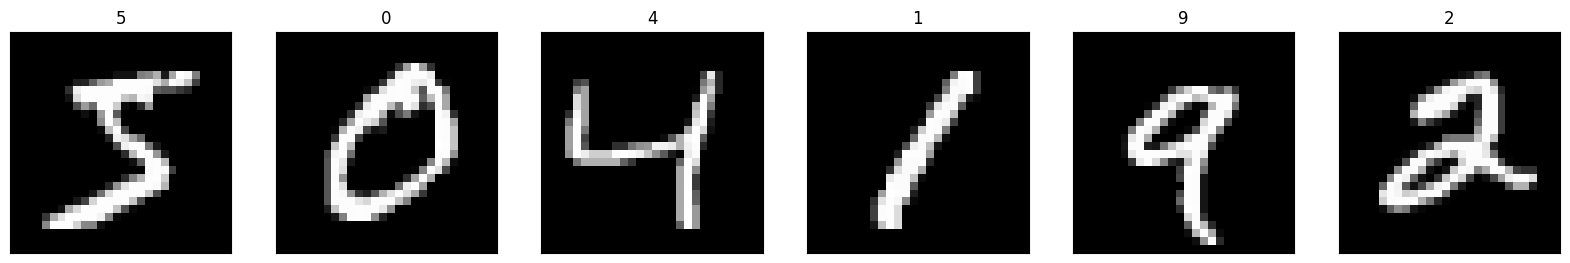

In [4]:
#visualize images
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

fig = plt.figure(figsize=(20,20))
for i in range(6):
  ax = fig.add_subplot(1,6, i+1, xticks=[], yticks=[])
  ax.imshow(X_train[i], cmap='gray')
  ax.set_title(str(y_train[i]))

In [5]:
# Rescale
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

print("shape", X_train.shape)
print(X_train.shape[0], "training")
print(X_test.shape[0], "testing")

shape (60000, 28, 28)
60000 training
10000 testing


In [6]:
# encoding of y
import tensorflow
num_classes = 10
print("Integer values labels")
print(y_train[:15])

if y_train.ndim == 1: # means no encoding
  y_train = tensorflow.keras.utils.to_categorical(y_train,num_classes)
  y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)
else:
  print("y_train is already one-hot encoded. skipping to_categorical")

print("one hot encoded")
print(y_train[:10])

Integer values labels
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]
one hot encoded
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [7]:
# reshape data to fit cnn
img_rows, img_col = 28,28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_col, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_col, 1)
input_shape = (img_rows, img_col, 1)

print("input shape", input_shape)
print("train shape", X_train.shape)

input shape (28, 28, 1)
train shape (60000, 28, 28, 1)


In [12]:
# model architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220,234 (860.29 KB)

 Trainable params: 220,234 (860.29 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [17]:
# Training of model
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath = 'model.weights.best.keras',verbose=1, save_best_only=True)

model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1, shuffle=True)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8842 - loss: 0.3755
Epoch 1: val_loss improved from inf to 0.04991, saving model to model.weights.best.keras
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8843 - loss: 0.3752 - val_accuracy: 0.9816 - val_loss: 0.0499
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9831 - loss: 0.0544
Epoch 2: val_loss improved from 0.04991 to 0.03236, saving model to model.weights.best.keras
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9831 - loss: 0.0544 - val_accuracy: 0.9882 - val_loss: 0.0324
Epoch 3/10
929/938 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9896 - loss: 0.0334
Epoch 3: val_loss did not improve from 0.03236
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9896 - loss: 0.0334 - val_accuracy: 0.9888 - val_loss: 0.0348
Epoch 4/10
936/938 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9924 - loss: 0.0254
Epoch 4: val_loss did not improve from 0.03236
938/938 ━━━━━━━━━━━━━━━━━━━━

In [18]:
model.load_weights('model.weights.best.keras')

In [19]:
# Evaluating models accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

print("accuracy - ", accuracy)

accuracy -  99.05999898910522


In [2]:
# Question 7: Load and preprocess the CIFAR-10 dataset using Keras, and create a CNN model to classify RGB images.
# Show your preprocessing and architecture.
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

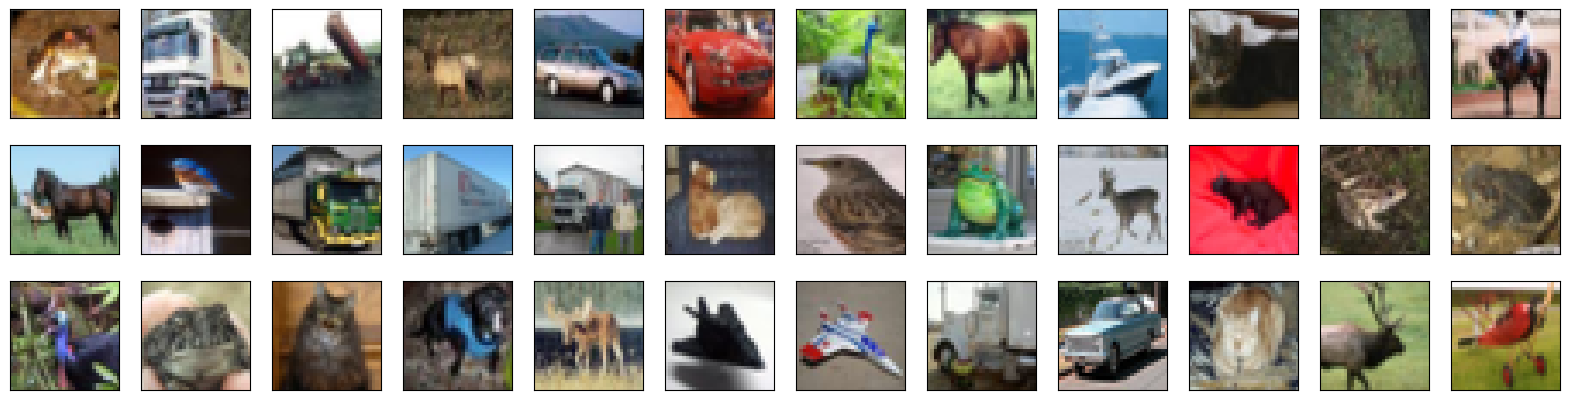

In [3]:
# visualising image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [4]:
# rescale
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [5]:
# breaking data into training, testing and validation
import tensorflow
from tensorflow import keras

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


In [6]:
# model architecture
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu',
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       512,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541,094 (2.06 MB)

 Trainable params: 541,094 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [8]:
# Train the model
from keras.callbacks import ModelCheckpoint

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.keras', verbose=1, save_best_only=True)

hist = model.fit(x_train, y_train, batch_size=32, epochs=10,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer],
          verbose=2, shuffle=True)

Epoch 1/10

Epoch 1: val_loss improved from inf to 1.31545, saving model to model.weights.best.keras
1407/1407 - 14s - 10ms/step - accuracy: 0.4149 - loss: 1.6036 - val_accuracy: 0.5342 - val_loss: 1.3155
Epoch 2/10

Epoch 2: val_loss improved from 1.31545 to 1.09053, saving model to model.weights.best.keras
1407/1407 - 4s - 3ms/step - accuracy: 0.5507 - loss: 1.2583 - val_accuracy: 0.6020 - val_loss: 1.0905
Epoch 3/10

Epoch 3: val_loss improved from 1.09053 to 1.04520, saving model to model.weights.best.keras
1407/1407 - 5s - 3ms/step - accuracy: 0.6066 - loss: 1.1169 - val_accuracy: 0.6368 - val_loss: 1.0452
Epoch 4/10

Epoch 4: val_loss improved from 1.04520 to 1.00245, saving model to model.weights.best.keras
1407/1407 - 6s - 4ms/step - accuracy: 0.6370 - loss: 1.0328 - val_accuracy: 0.6474 - val_loss: 1.0025
Epoch 5/10

Epoch 5: val_loss improved from 1.00245 to 0.90998, saving model to model.weights.best.keras
1407/1407 - 4s - 3ms/step - accuracy: 0.6595 - loss: 0.9817 - val_acc

In [9]:
model.load_weights('model.weights.best.keras')

In [10]:
# visualise some predictions
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


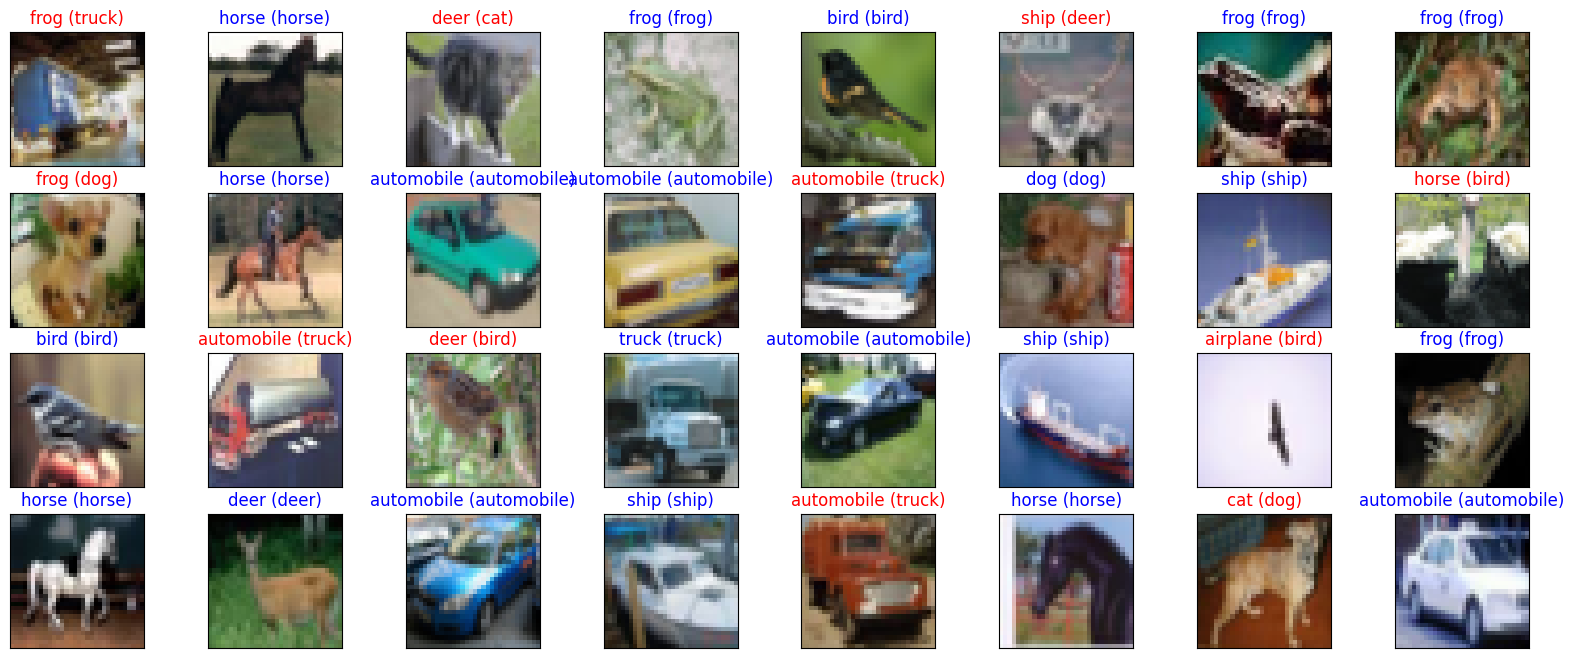

In [11]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

In [8]:
# Question 8: Using PyTorch, write a script to define and train a CNN on the MNIST dataset.
# Include model definition, data loaders, training loop, and accuracy evaluation.
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [9]:
# load  and preprocess data
transform = transforms.Compose([
    transforms.ToTensor(), # convert to [0,1]
    transforms.Normalize((0.1307), (0.3081,)) # Normalizes with MNIST mean and std
])

train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=62, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1000, shuffle= False)

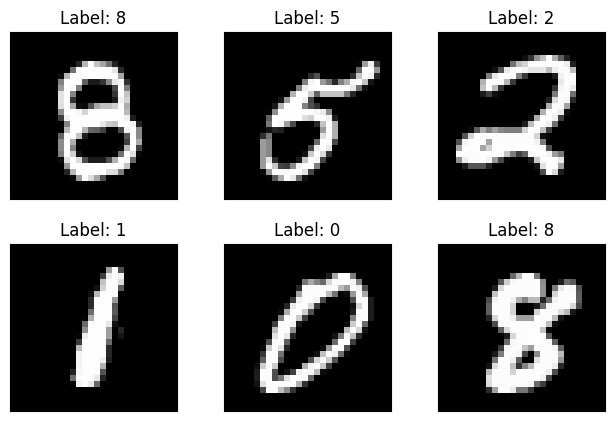

In [10]:
# Visualize some images
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Label: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
plt.show()

In [18]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(1,32, kernel_size=3)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
    self.dropout1 = nn.Dropout2d(0.25)
    self.dropout2 = nn.Dropout(0.5)
    self.fc1 = nn.Linear(9216,128)
    self.fc2 = nn.Linear(128, 10)
  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, 2)
    x = self.dropout1(x)
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = self.dropout2(x)
    x = self.fc2(x)
    return F.log_softmax(x, dim=1)

In [16]:
# Model Summary
!pip install torchsummary

In [19]:
from torchsummary import summary
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
         Dropout2d-3           [-1, 64, 12, 12]               0
            Linear-4                  [-1, 128]       1,179,776
           Dropout-5                  [-1, 128]               0
            Linear-6                   [-1, 10]           1,290
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.52
Params size (MB): 4.58
Estimated Total Size (MB): 5.10
----------------------------------------------------------------


In [20]:
# training loop
def train(model, device, train_loader, optimizer,epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()

    if batch_idx % 100 == 0:
      print(
          f"epoch: {epoch}"
          f"[{batch_idx*len(data)}/{len(train_loader.dataset)}]"
          f"({100. * batch_idx / len(train_loader):.0f}%)]\t"
          f"Loss: {loss.item():.6f}"
      )


In [26]:
# testing loop
def test(model, device, test_loader):
  model.eval()
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for data, target in test_loader:
      data, target = data.to(device), target.to(device)

      output= model(data)

      test_loss+=F.nll_loss(output, target, reduction='sum').item()

      pred = output.argmax(dim=1)

      correct+= pred.eq(target).sum().item()
  test_loss/= len(test_loader.dataset)
  accuracy = 100.* correct/len(test_loader.dataset)
  print(f"\nTest set: Average loss: {test_loss:.6f}, "
          f"Accuracy: {correct}/{len(test_loader.dataset)} "
          f"({accuracy:.2f}%)\n")

In [27]:
for epoch in range(1,6):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

epoch: 1[0/60000](0%)]	Loss: 0.064524
epoch: 1[6200/60000](10%)]	Loss: 0.121090
epoch: 1[12400/60000](21%)]	Loss: 0.013785
epoch: 1[18600/60000](31%)]	Loss: 0.078461
epoch: 1[24800/60000](41%)]	Loss: 0.027512
epoch: 1[31000/60000](52%)]	Loss: 0.096548
epoch: 1[37200/60000](62%)]	Loss: 0.075260
epoch: 1[43400/60000](72%)]	Loss: 0.115207
epoch: 1[49600/60000](83%)]	Loss: 0.089343
epoch: 1[55800/60000](93%)]	Loss: 0.014890

Test set: Average loss: 0.033111, Accuracy: 9893/10000 (98.93%)

epoch: 2[0/60000](0%)]	Loss: 0.022102
epoch: 2[6200/60000](10%)]	Loss: 0.009500
epoch: 2[12400/60000](21%)]	Loss: 0.034283
epoch: 2[18600/60000](31%)]	Loss: 0.092287
epoch: 2[24800/60000](41%)]	Loss: 0.016095
epoch: 2[31000/60000](52%)]	Loss: 0.047545
epoch: 2[37200/60000](62%)]	Loss: 0.034134
epoch: 2[43400/60000](72%)]	Loss: 0.010058
epoch: 2[49600/60000](83%)]	Loss: 0.004749
epoch: 2[55800/60000](93%)]	Loss: 0.021262

Test set: Average loss: 0.029682, Accuracy: 9908/10000 (99.08%)

epoch: 3[0/60000](0%

In [28]:
# saving the model
model_path = 'mnist_cnn.pth'
torch.save(model.state_dict(), model_path)
print(f"model save to {model_path}")

model save to mnist_cnn.pth


In [29]:
# load the model
loaded_model = CNN().to(device)
loaded_model.load_state_dict(torch.load(model_path))
loaded_model.eval()
print("Model loaded")

Model loaded


In [33]:
# make predictions with loaded model
def predict(model, device, data_loader, num_samples=6):
  model.eval()

  data_iter = iter(data_loader)
  images, labels = next(data_iter)

  images, labels = images.to(device), labels.to(device)

  outputs = model(images)
  preds = outputs.argmax(dim=1)

  # Visualize predictions
  fig = plt.figure()
  for i in range(num_samples):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.imshow(images[i][0].cpu(), cmap='gray', interpolation='none')
    plt.title(f"Pred: {preds[i].item()}, Label: {labels[i].item()}")
    plt.xticks([])
    plt.yticks([])
  plt.show()

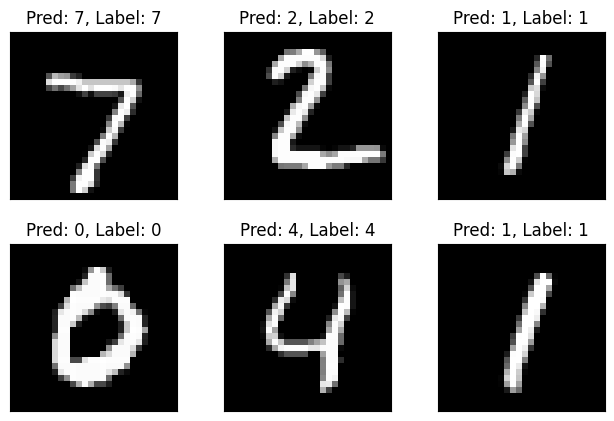

In [34]:
# Run predictions
predict(loaded_model, device, test_loader)

In [1]:
# Question 9: Given a custom image dataset stored in a local directory, write code using Keras ImageDataGenerator to preprocess and train a CNN model.
#!/bin/bash
!curl -L -o cats-and-dogs-mini-dataset.zip\
  https://www.kaggle.com/api/v1/datasets/download/aleemaparakatta/cats-and-dogs-mini-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 21.8M  100 21.8M    0     0  7595k      0  0:00:02  0:00:02 --:--:-- 13.6M


In [2]:
!mkdir data
!unzip cats-and-dogs-mini-dataset.zip -d dataset

Archive:  cats-and-dogs-mini-dataset.zip
  inflating: dataset/cats_set/cat.4001.jpg  
  inflating: dataset/cats_set/cat.4002.jpg  
  inflating: dataset/cats_set/cat.4003.jpg  
  inflating: dataset/cats_set/cat.4004.jpg  
  inflating: dataset/cats_set/cat.4005.jpg  
  inflating: dataset/cats_set/cat.4006.jpg  
  inflating: dataset/cats_set/cat.4007.jpg  
  inflating: dataset/cats_set/cat.4008.jpg  
  inflating: dataset/cats_set/cat.4009.jpg  
  inflating: dataset/cats_set/cat.4010.jpg  
  inflating: dataset/cats_set/cat.4011.jpg  
  inflating: dataset/cats_set/cat.4012.jpg  
  inflating: dataset/cats_set/cat.4013.jpg  
  inflating: dataset/cats_set/cat.4014.jpg  
  inflating: dataset/cats_set/cat.4015.jpg  
  inflating: dataset/cats_set/cat.4016.jpg  
  inflating: dataset/cats_set/cat.4017.jpg  
  inflating: dataset/cats_set/cat.4018.jpg  
  inflating: dataset/cats_set/cat.4019.jpg  
  inflating: dataset/cats_set/cat.4020.jpg  
  inflating: dataset/cats_set/cat.4021.jpg  
  inflating: d

In [3]:
import os

# Create the 'data' directory if it doesn't exist
data_dir = 'data'
os.makedirs(data_dir, exist_ok=True)

# Create the 'train' and 'test' subdirectories within 'data'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [4]:
import os

# Define the source and destination paths
source_cat = 'dataset/cats_set'
dest_cat = 'dataset/cat'
source_dog = 'dataset/dogs_set'
dest_dog = 'dataset/dog'

# Rename the directories if they exist
if os.path.exists(source_cat):
  os.rename(source_cat, dest_cat)

if os.path.exists(source_dog):
  os.rename(source_dog, dest_dog)

In [5]:
import os
import random
import shutil

def train_test_split_folder(source_folder, train_folder, test_folder, split_ratio=0.8):
    """
    Splits a folder of images into training and testing sets.

    Args:
        source_folder: Path to the source folder containing subfolders for each class.
        train_folder: Path to the folder where the training set will be saved.
        test_folder: Path to the folder where the testing set will be saved.
        split_ratio: The ratio of images to include in the training set (default is 0.8).
    """

    if not os.path.exists(train_folder):
        os.makedirs(train_folder)
    if not os.path.exists(test_folder):
        os.makedirs(test_folder)

    for class_name in os.listdir(source_folder):
        class_source_path = os.path.join(source_folder, class_name)

        if os.path.isdir(class_source_path):  # Check if it is a directory
            train_class_path = os.path.join(train_folder, class_name)
            test_class_path = os.path.join(test_folder, class_name)

            if not os.path.exists(train_class_path):
                os.makedirs(train_class_path)
            if not os.path.exists(test_class_path):
                os.makedirs(test_class_path)

            images = [f for f in os.listdir(class_source_path) if os.path.isfile(os.path.join(class_source_path, f))]
            random.shuffle(images)
            split_index = int(len(images) * split_ratio)
            train_images = images[:split_index]
            test_images = images[split_index:]

            for image in train_images:
                source_path = os.path.join(class_source_path, image)
                destination_path = os.path.join(train_class_path, image)
                shutil.copy(source_path, destination_path)

            for image in test_images:
                source_path = os.path.join(class_source_path, image)
                destination_path = os.path.join(test_class_path, image)
                shutil.copy(source_path, destination_path)


# Example usage (assuming you have your data organized in a 'data/train' folder):
train_test_split_folder("dataset", "data/train", "data/test")

In [6]:
import os

def count_images_per_folder(root_folder):
  """
  Counts the number of images in each subfolder of a given root folder.

  Args:
    root_folder: The path to the root folder.

  Returns:
    A dictionary where keys are folder paths and values are the number of images in each folder.
  """

  image_counts = {}
  for dirpath, dirnames, filenames in os.walk(root_folder):
    image_count = 0
    for filename in filenames:
      if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        image_count += 1
    if image_count > 0 :
      image_counts[dirpath] = image_count
  return image_counts

# Example usage
image_counts = count_images_per_folder("data")
for folder, count in image_counts.items():
    print(f"Folder: {folder}, Number of images: {count}")


Folder: data/test/cat, Number of images: 100
Folder: data/test/dog, Number of images: 100
Folder: data/train/cat, Number of images: 400
Folder: data/train/dog, Number of images: 400


In [7]:
!apt install tree -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (53.4 kB/s)
Selecting previously unselected package tree.
(Reading database ... 121713 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [8]:
!tree -d /content/data

/content/data
├── test
│   ├── cat
│   └── dog
└── train
    ├── cat
    └── dog

6 directories


In [9]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

In [10]:
# Set paths to train and test folders
train_dir = "data/train"
test_dir = "data/test"
image_size = (128, 128)
batch_size = 32

In [11]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


train_data = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

test_data = datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 640 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [12]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # binary classification
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Training the Model
checkpoint_path = 'dog_cat_cnn_model.keras'
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True)

model.fit(
    train_data,
    epochs=10,
    validation_data=test_data,
    callbacks=[checkpoint]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - accuracy: 0.5268 - loss: 0.6950 - val_accuracy: 0.5000 - val_loss: 0.6976
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.5361 - loss: 0.6866 - val_accuracy: 0.5250 - val_loss: 0.6915
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.6197 - loss: 0.6689 - val_accuracy: 0.5000 - val_loss: 0.6926
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.6213 - loss: 0.6535 - val_accuracy: 0.5500 - val_loss: 0.6847
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.6102 - loss: 0.6505 - val_accuracy: 0.5750 - val_loss: 0.6787
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.6483 - loss: 0.6436 - val_accuracy: 0.6250 - val_loss: 0.6667
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6838 - loss: 0.6081 - val_accuracy: 0.6750 - val_loss: 0.6558
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.7361 - loss: 0.5741 - val_accuracy: 0.7000 - 

In [14]:
# Save final model
model.save('dog_cat_final_model.keras')

In [15]:
from tensorflow.keras.models import load_model

# Load the best saved model
model = load_model('dog_cat_final_model.keras')

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set parameters
val_dir = test_dir  # same directory used for training
image_size = (128, 128)
batch_size = 32

# Recreate the validation generator
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Evaluate model accuracy
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

Found 50 images belonging to 2 classes.
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 857ms/step - accuracy: 0.6142 - loss: 0.6627
Validation Accuracy: 64.00%


In [17]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path, model):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]

    if prediction > 0.5:
        print("Predicted: Dog")
    else:
        print("Predicted: Cat")

**Question 10: You are working on a web application for a medical imaging startup. Your task is to build and deploy a CNN model that classifies chest X-ray images into “Normal” and “Pneumonia” categories. Describe your end-to-end approach–from data preparation and model training to deploying the model as a web app using Streamlit.**

For this task, I begin by preparing the chest X-ray dataset by organizing images into Normal and Pneumonia folders. I then split the data into training, validation, and test sets and apply preprocessing like resizing, normalization, and data augmentation. These steps improve the quality of the data and help the model generalize better.

Next, I design and train a CNN model with several convolutional, pooling, and fully connected layers. I use 3×3 filters, ReLU activation, batch normalization, and the Adam optimizer. The model is trained using binary cross-entropy loss, and techniques like early stopping help prevent overfitting. After training, I evaluate the model on the test set and save it in a suitable format.

To deploy the model, I build a Streamlit web app. The app allows users to upload a chest X-ray image, which is preprocessed and passed to the trained model for prediction. The app then displays whether the image is Normal or shows Pneumonia, along with probability scores.

Finally, I deploy the Streamlit application on a platform like Streamlit Cloud or AWS EC2. I upload the saved model, include all required dependencies, and test the web app to ensure it works smoothly online. This completes the end-to-end pipeline from data preparation to deployment.
